In [59]:
! wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

File ‘sp500_close.csv’ already there; not retrieving.



In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [61]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [62]:
goog = close [['GOOG' ]].copy().dropna()
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


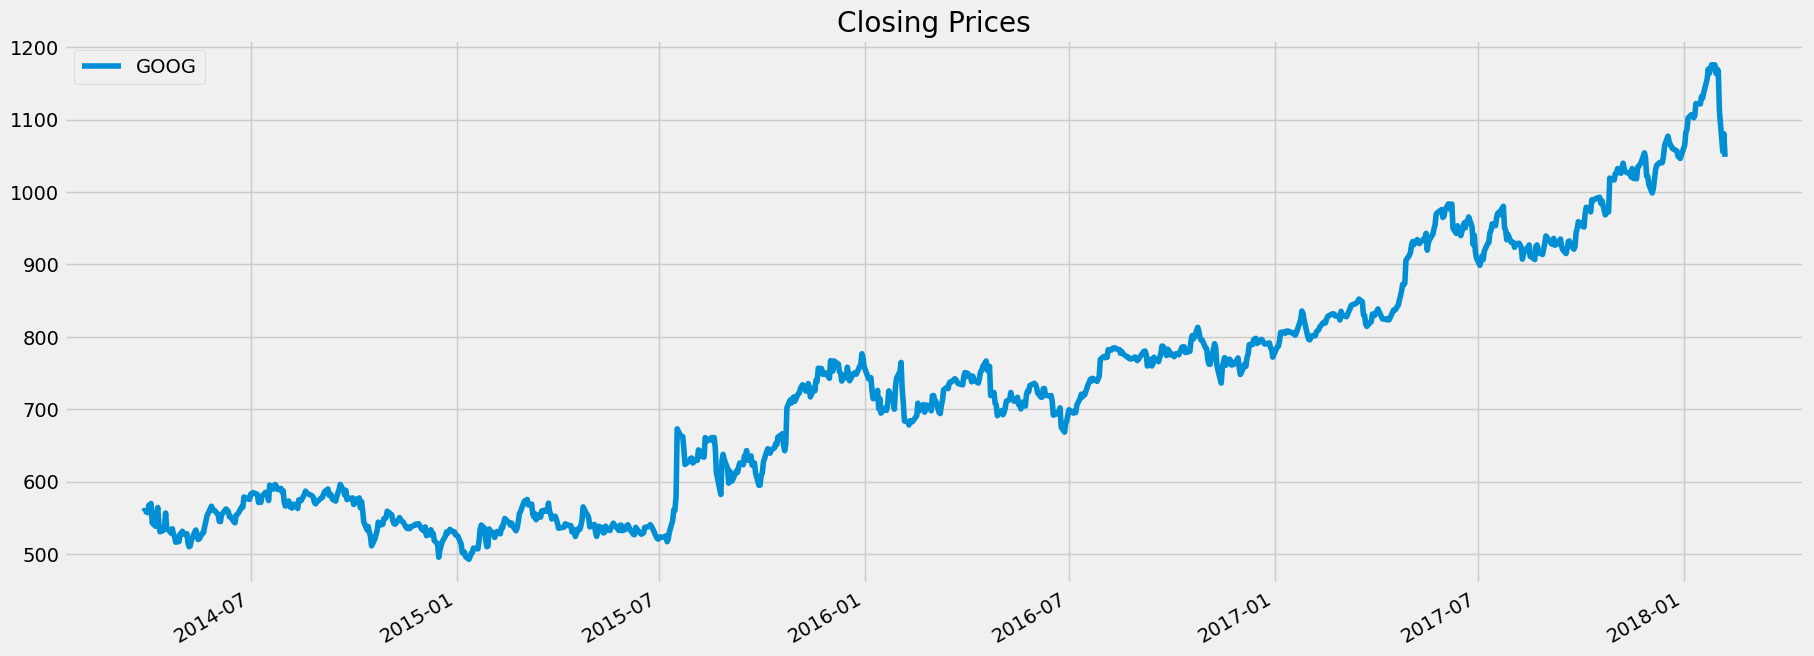

In [63]:
goog.plot(
    style='-',
    figsize=(20,8),
    title='Closing Prices'
)
plt.show()

<Axes: title={'center': 'Closing Prices'}>

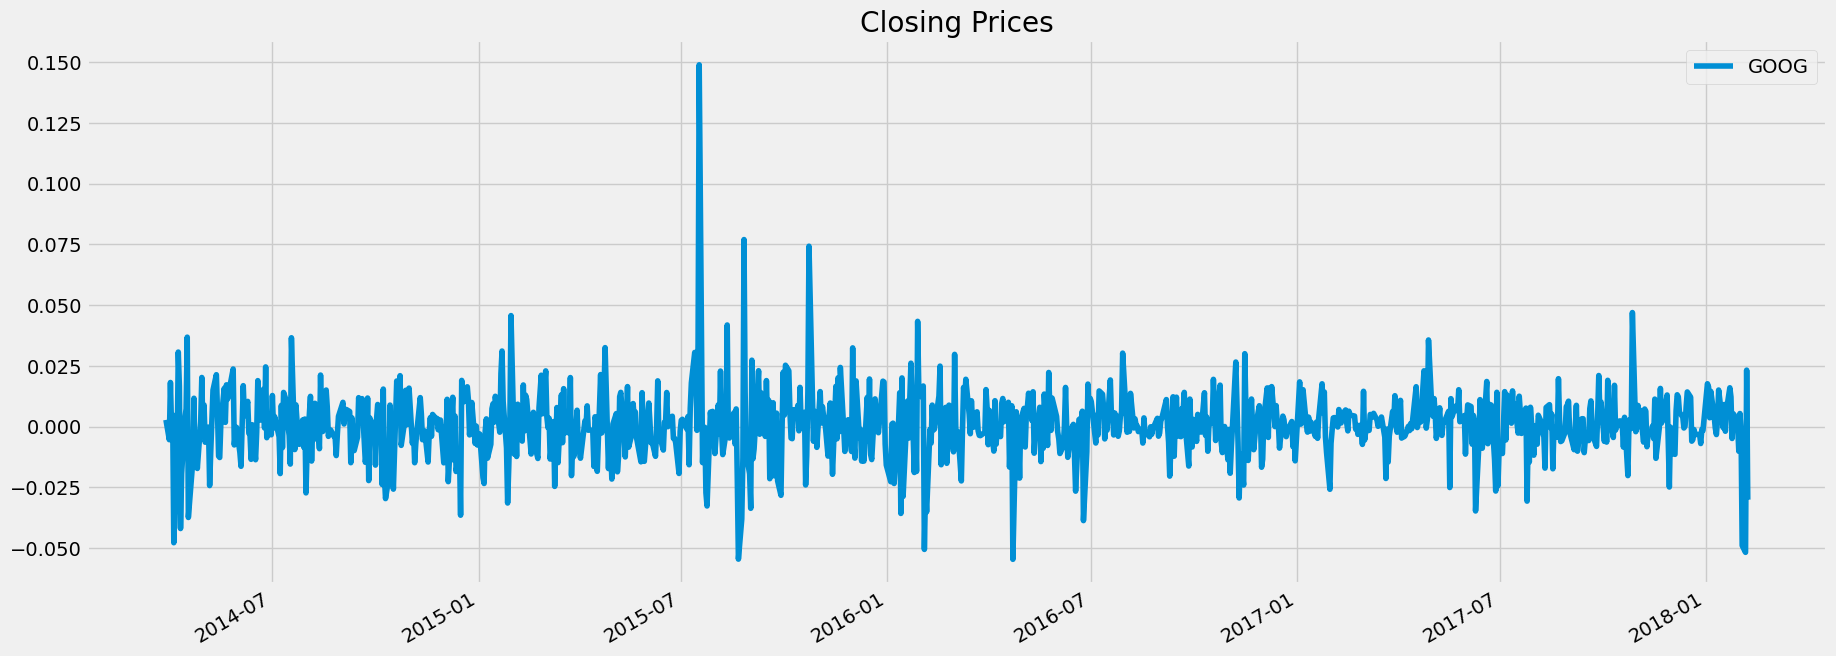

In [64]:
goog_ret = np.log(goog.pct_change (1) + 1)
goog_ret.plot(
    style='-',
    figsize=(20,8),
    title='Closing Prices'
)

In [65]:
goog['SMA 10'] = goog['GOOG'].rolling (10).mean()
goog.head (20)

,GOOG,SMA 10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [66]:
type(goog['GOOG' ].rolling(10))

pandas.core.window.rolling.Rolling

<Axes: title={'center': 'Closing Prices'}>

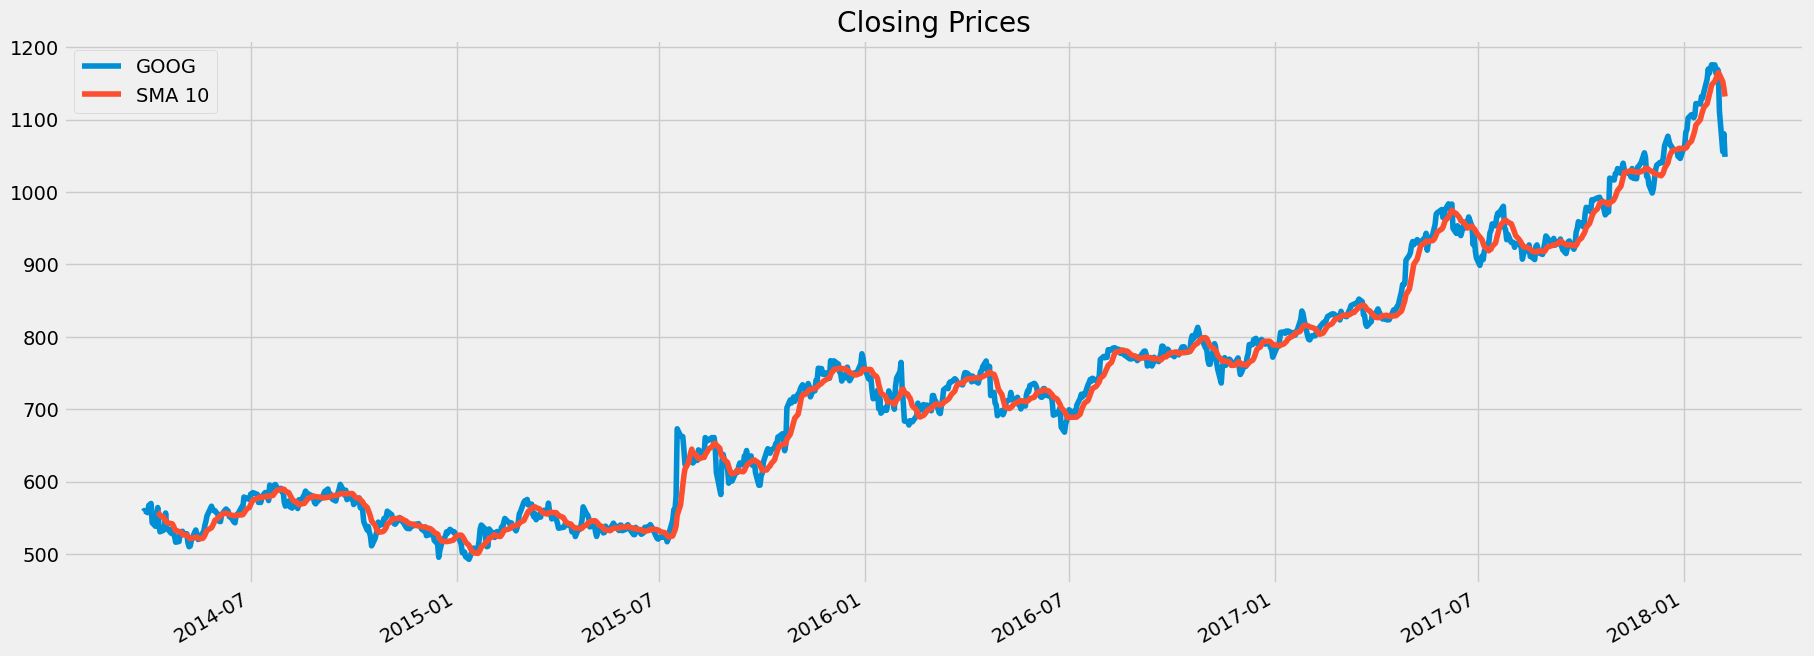

In [67]:
goog.plot(
    style='-',
    figsize=(20,8),
    title='Closing Prices'
)

<Axes: title={'center': 'Closing Prices'}>

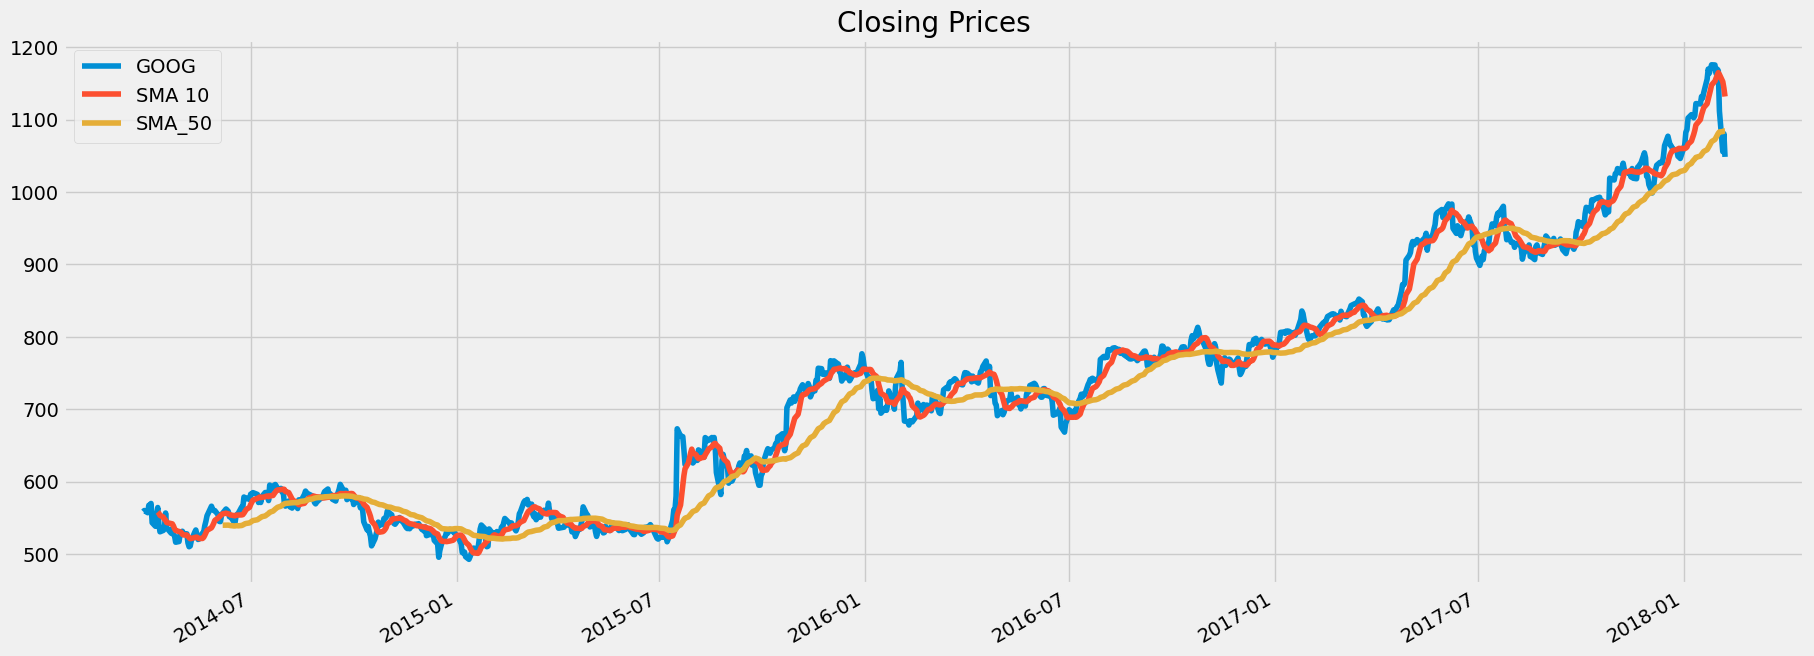

In [68]:
goog['SMA_50'] = goog['GOOG'].rolling(50).mean()
goog.plot(
    style='-',
    figsize=(20,8),
    title='Closing Prices'
)

In [69]:
goog_aapl = close [['GOOG', 'AAPL']].copy().dropna ()
cov = goog_aapl.rolling(50).cov()
cov # covariance

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [70]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [71]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change (1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [72]:
goog_aapl_ret[ 'GOOG-SMA-50'] = goog_aapl_ret['GOOG' ].rolling (50).mean()
goog_aapl_ret[ 'AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling (50).mean()

<Axes: >

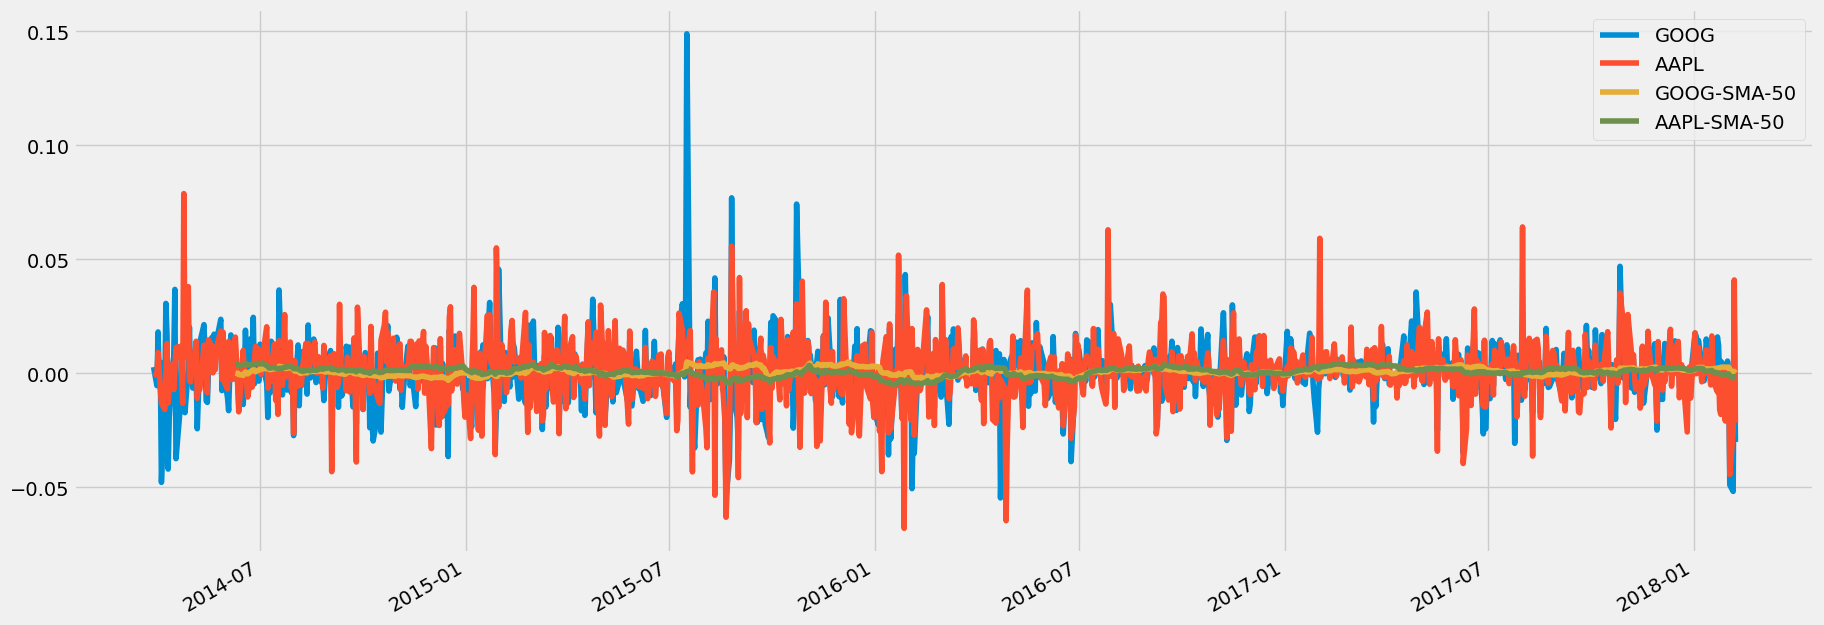

In [76]:
goog_aapl_ret.plot(
    figsize=(20,8),
    )

In [80]:
cov = goog_aapl_ret[['GOOG', 'AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [79]:
corr = goog_aapl_ret [['GOOG', 'AAPL']].rolling (50).corr()
corr.tail(16)

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000